In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from word2number import w2n
from sklearn import linear_model

In [2]:
df = pd.read_csv("hiring.csv")
df

experience  test_score  interview_score  salary
0       zero         8.0                9   50000
1       zero         8.0                6   45000
2       five         6.0                7   60000
3        two        10.0               10   65000
4      seven         9.0                6   70000
5      three         7.0               10   62000
6        ten         NaN                7   72000
7     eleven         7.0                8   80000

In [3]:
df.experience = df.experience.apply(w2n.word_to_num)

In [4]:
df.test_score.median()

8.0

In [5]:
import math
median_test_score = math.floor(df.test_score.median())
median_test_score

8

In [6]:
df.interview_score.median()

7.5

In [7]:
import math
median_interview_score = math.floor(df.interview_score.median())
median_interview_score

7

In [8]:
df.test_score = df.test_score.fillna(median_test_score)
df.test_score

0     8.0
1     8.0
2     6.0
3    10.0
4     9.0
5     7.0
6     8.0
7     7.0
Name: test_score, dtype: float64

In [9]:
df

experience  test_score  interview_score  salary
0           0         8.0                9   50000
1           0         8.0                6   45000
2           5         6.0                7   60000
3           2        10.0               10   65000
4           7         9.0                6   70000
5           3         7.0               10   62000
6          10         8.0                7   72000
7          11         7.0                8   80000

In [10]:
reg = linear_model.LinearRegression()
reg.fit(df[['experience','test_score','interview_score']],df.salary)

LinearRegression()

In [11]:
reg.coef_

array([2812.95487627, 1845.70596798, 2205.24017467])

In [12]:
reg.intercept_

17737.263464337688

In [13]:
reg.predict([[8,6,4]])

array([60136.09898108])

In [14]:
reg.predict([[15,8,7]])

array([90133.91557496])

In [15]:
d = pd.read_csv("experience.csv")
d.experience = d.experience.apply(w2n.word_to_num)
d

experience  test_score  interview_score
0           0           8                9
1           0           8                6
2           5           6                7
3           2          10               10
4           7           9                6
5           3           7               10
6          10           8                7
7          11           7                8
8           8           6                4
9          15           8                7

In [16]:
p = reg.predict(d)

In [17]:
d['salary'] = p

In [18]:
d.to_csv("prediction.csv",index=False)

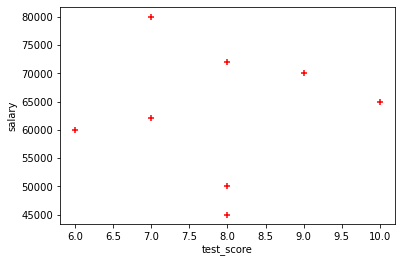

In [19]:
%matplotlib inline
plt.xlabel('test_score')
plt.ylabel('salary')
plt.scatter(df.test_score,df.salary,color='red',marker='+')

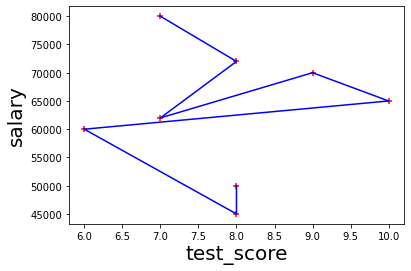

In [21]:
%matplotlib inline 
plt.xlabel('test_score', fontsize=20)
plt.ylabel('salary', fontsize=20)
plt.scatter(df.test_score,df.salary,color='red',marker='+')
plt.plot(df.test_score,df.salary,color='blue')

In [23]:
reg = linear_model.LinearRegression()
reg.fit(df[['test_score']],df.salary)

LinearRegression()

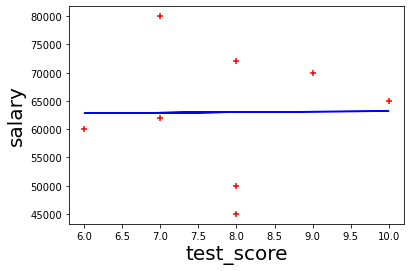

In [26]:
%matplotlib inline 
plt.xlabel('test_score', fontsize=20)
plt.ylabel('salary', fontsize=20)
plt.scatter(df.test_score,df.salary,color='red',marker='+')
plt.plot(df.test_score,reg.predict(df[['test_score']]),color='blue')